In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import imageio
import numpy as np
import scipy.ndimage.filters

## Load input images

In [2]:
IMG_FPATH = 'img/me_512.png'
IMG_SEG_FPATH = 'img/me_512_seg.png'
IMG_BG_FPATH = 'img/beach-bg.png'

img = imageio.imread(IMG_FPATH).astype(np.float32) / 255.
img_seg = imageio.imread(IMG_SEG_FPATH).astype(np.float32) / 255.
img_bg = imageio.imread(IMG_BG_FPATH).astype(np.float32) / 255.

## Show image and segmentation

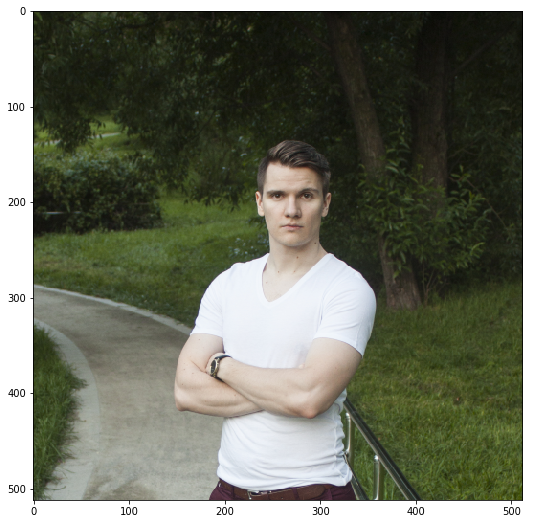

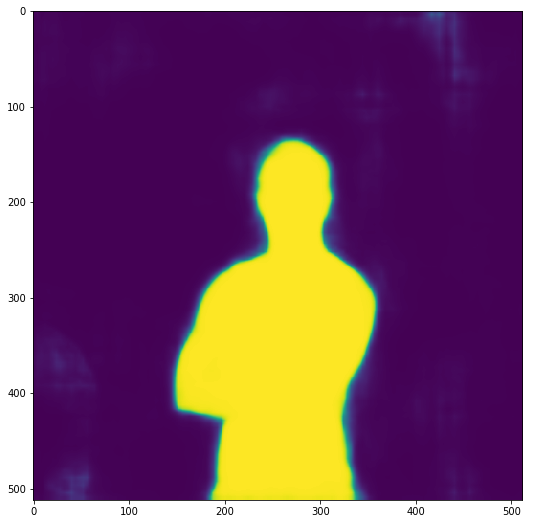

In [3]:
plt.figure(figsize=[9, 9]); _=plt.imshow(img)
plt.figure(figsize=[9, 9]); _=plt.imshow(img_seg)

## Prepare segmentation mask: binarization and smoothing

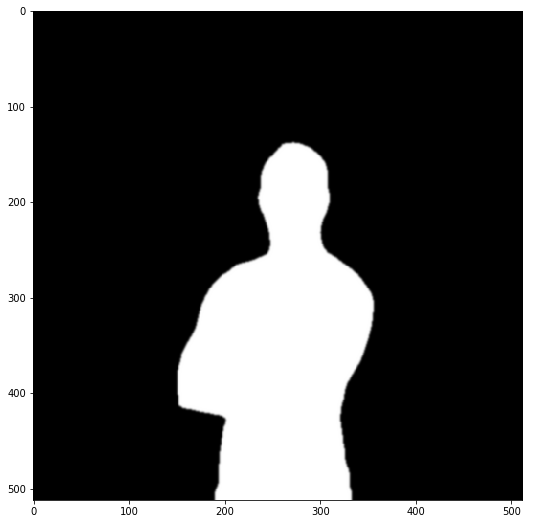

In [4]:
BIN_THRESHOLD = 0.9

img_seg_bin = (img_seg > BIN_THRESHOLD).astype(np.float32)
img_seg_bin = np.tile(img_seg_bin[..., None], [1, 1, 3])
img_seg_smooth = scipy.ndimage.filters.gaussian_filter(img_seg_bin, [1., 1., 0])

plt.figure(figsize=[9, 9]); _=plt.imshow(img_seg_smooth)

## Prepare blurred image for background

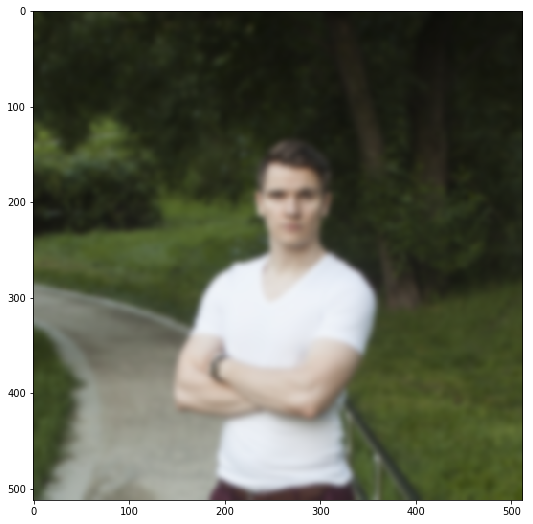

In [5]:
img_blur = scipy.ndimage.filters.gaussian_filter(img, [3, 3, 0])

plt.figure(figsize=[9, 9]); _=plt.imshow(img_blur)

## Show masked foreground image

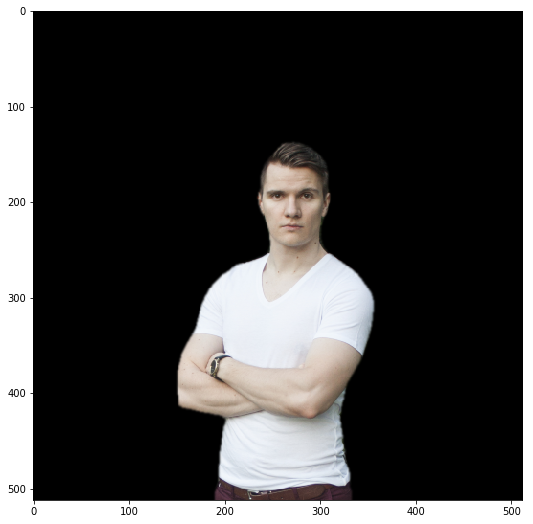

In [6]:
img_masked = img * img_seg_smooth

plt.figure(figsize=[9, 9]); _=plt.imshow(img_masked)

## Get and show composed image: blurred background + masked foreground

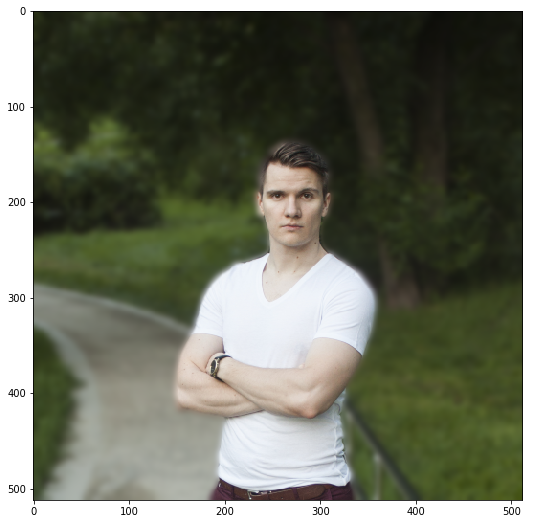

In [7]:
img_compose = img_blur * (1.0 - img_seg_smooth) + img * img_seg_smooth

plt.figure(figsize=[9, 9]); _=plt.imshow(img_compose)

## Show new background image

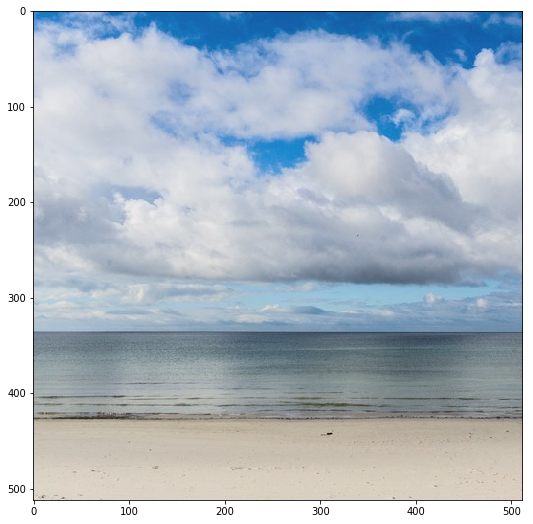

In [8]:
plt.figure(figsize=[9, 9]); _=plt.imshow(img_bg)

## Get and show composed image: new background + masked foreground

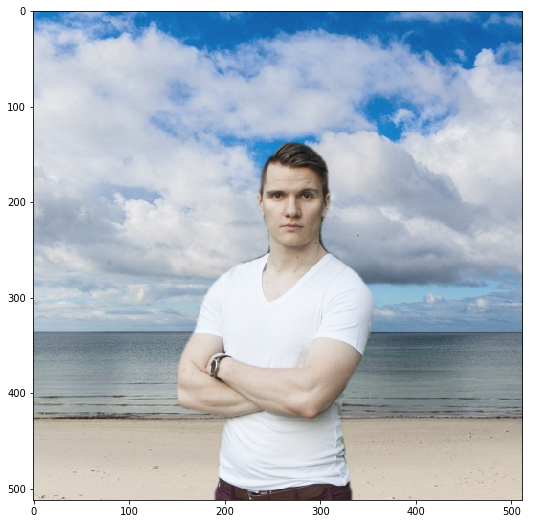

In [9]:
img_compose2 = img_bg * (1.0 - img_seg_smooth) + img * img_seg_smooth

plt.figure(figsize=[9, 9]); _=plt.imshow(img_compose2)